In [187]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [188]:
import lvmnebular
import numpy as np
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from scipy.interpolate import interp1d

In [189]:
u=lvmnebular.simulation()

u.loadsim('Bubble_v2_1e-8',900)                    #native simulation  pert 0.9_0.9_Bubble_v2_1e-8
#u.loadsim('Bubble_v2_5e-14', 900, vorbin=True)     #voronoi simulation
#u.loadsim('Bubble_v2_5e-14', 900, snbin=True)      #snbin simulation

Loading simulation: /home/amrita/LVM/lvmnebular/Bubble_v2_1e-8

Loading simfile: /home/amrita/LVM/lvmnebular/Bubble_v2_1e-8/outputs/Bubble_v2_1e-8_linear_full_900_flux.fits
no.of bins: 169


In [191]:
#native simulation
u.fitlines(sys_vel=20, lines0= np.array([9532, 9069, 7319, 7320, 7330, 7331, 6731, 6716, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, snbin=False, rbinmax=260, drbin=15, loadfile=True, plot=False) #native sim

#u.fitlines(sys_vel=20, lines0= np.array([9532, 9069, 7319, 7320, 7330, 7331, 6731, 6716, 6584, 6563, 6548, 6312, 5755, 5007, 4959, 4861, 4363, 4069, 4076, 3970, 3729, 3726]), radbin=False, vorbin=False, snbin=False, rbinmax=260, drbin=15, loadfile=False, plot=False) #native sim


Fitting Emmission Lines: ['9532' '9069' '7319' '7320' '7330' '7331' '6731' '6716' '6584' '6563'
 '6548' '6312' '5755' '5007' '4959' '4861' '4363' '4069' '4076' '3970'
 '3729' '3726']
linefitfile: /home/amrita/LVM/lvmnebular/Bubble_v2_1e-8/Bubble_v2_1e-8_linefits.fits
169
Fitting Line: 9532.635906591086
Fitting Line: 9069.60501855587
Fitting Line: 7319.488271122552
Fitting Line: 7320.488337835371
Fitting Line: 7330.489004963561
Fitting Line: 7331.48907167638
Fitting Line: 6731.449043984956
Fitting Line: 6716.44804329267
Fitting Line: 6584.439237200558
Fitting Line: 6563.437836231357
Fitting Line: 6548.436835539072
Fitting Line: 6312.421091313779
Fitting Line: 5755.383932273573
Fitting Line: 5007.334031084932
Fitting Line: 4959.330828869618
Fitting Line: 4861.324291013352
Fitting Line: 4363.29106802947
Fitting Line: 4069.2714544606724
Fitting Line: 4076.271921450406
Fitting Line: 3970.264849891588
Fitting Line: 3729.248772102199
Fitting Line: 3726.248571963742
Fitting Line: 9532.63590659

In [192]:
u.runpyneb(niter=3, pertsim=False)

warng _ManageAtomicData: rec data not available for Al2
warng _ManageAtomicData: rec data not available for Ar2
warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: rec data not available for Ar4
warng _ManageAtomicData: rec data not available for Ar5
warng _ManageAtomicData: rec data not available for Ba2
warng _ManageAtomicData: rec data not available for Ba4
ERROR None: No data for this case B
ERROR None: No data for this case B
warng _ManageAtomicData: rec data not available for Ca5
warng _ManageAtomicData: rec data not available for Cl2
warng _ManageAtomicData: rec data not available for Cl3
warng _ManageAtomicData: rec data not available for Cl4
warng _ManageAtomicData: rec data not available for Fe3
warng _ManageAtomicData: rec data not available for K4
warng _ManageAtomicData: rec data not available for K5
warng _ManageAtomicData: rec data not available for Mg5
warng _ManageAtomicData: rec data not available for Mg7
ERROR None: No data for this case 

/home/amrita/LVM/lvmnebular/lvmnebular.py:379: RuntimeWarning: Mean of empty slice
  self.TeO2 = np.nanmean(TO2, axis=1)
/home/amrita/miniconda3/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1872: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amrita/LVM/lvmnebular/lvmnebular.py:395: RuntimeWarning: Mean of empty slice
  self.TeO3 = np.nanmean(TO3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:409: RuntimeWarning: Mean of empty slice
  self.TeN2 = np.nanmean(TN2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:426: RuntimeWarning: Mean of empty slice
  self.TeS2 = np.nanmean(TS2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:440: RuntimeWarning: Mean of empty slice
  self.TeS3 = np.nanmean(TS3, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:458: RuntimeWarning: Mean of empty slice
  self.neO2 = np.nanmean(NO2, axis=1)
/home/amrita/LVM/lvmnebular/lvmnebular.py:472: RuntimeWarning: Mean of empty

In [193]:
print(np.nanmean(u.linefitdict['TeO3']), np.nanmean(u.linefitdict['TeO2']), np.nanmean(u.linefitdict['TeS3']), np.nanmean(u.linefitdict['TeN2']), np.nanmean(u.linefitdict['neO2']), np.nanmean(u.linefitdict['neS2']))

7277.894326631129 40594.85850774025 7340.0557345885245 7264.970916539631 102.98573136023519 140.6000663165403


In [196]:
u.chi('Bubble_v2_1e-8')

[ 6473.57774941  6412.26345584  6429.72232476  6416.13910586
  6467.71312099  6452.63782907  6473.57774941  6481.40552973
  6431.53112554  6435.55250486  6443.60280828  6406.45437406
  6463.4023064   6406.45437406  6412.26345584  6438.50311501
  6412.26345584  6420.55217463  6416.40647821  6722.68782691
  6602.40577103  6570.6363405   6617.43455891  6622.90024506
  6500.20374877  6612.45564425  6465.89415281  6683.3385932
  6493.90908133  6555.79917379  6429.72232476  6514.77931655
  6422.09077253  6547.33585564  6455.05830386  6431.93315037
  6465.08587457  7097.3595325   6923.83812785  6838.99550508
  6847.76444942  6950.94007191  6950.94007191  6758.36000205
  6887.72303495  6664.08013448  6919.51163383  6658.52850925
  7049.27828156  6743.16921955  6853.97369112  6600.9615034
  6754.98131743  6550.54245211  6749.17814922  6577.07387046
  6838.46113243  6664.08013448  6589.00686173  6597.5240453
  6688.77156136  7379.84744629  7281.97820756  7191.2485095
  7170.75076584  7203.470381

/home/amrita/LVM/lvmnebular/lvmnebular.py:795: RuntimeWarning: invalid value encountered in scalar divide
  Teproj[i]=trapezoid(T0aux*aaux*neaux*np.cos(theta)**(-2), x=theta)/trapezoid(aaux*neaux*np.cos(theta)**(-2), x=theta)
/home/amrita/LVM/lvmnebular/lvmnebular.py:796: RuntimeWarning: invalid value encountered in scalar divide
  aproj[i]=trapezoid(aaux*neaux*np.cos(theta)**(-2), x=theta)/trapezoid(neaux*np.cos(theta)**(-2), x=theta)


ADF_T0 [OIII]: 0.0032432412621549904
ADF_T0 [NII]: 0.014735022561333484


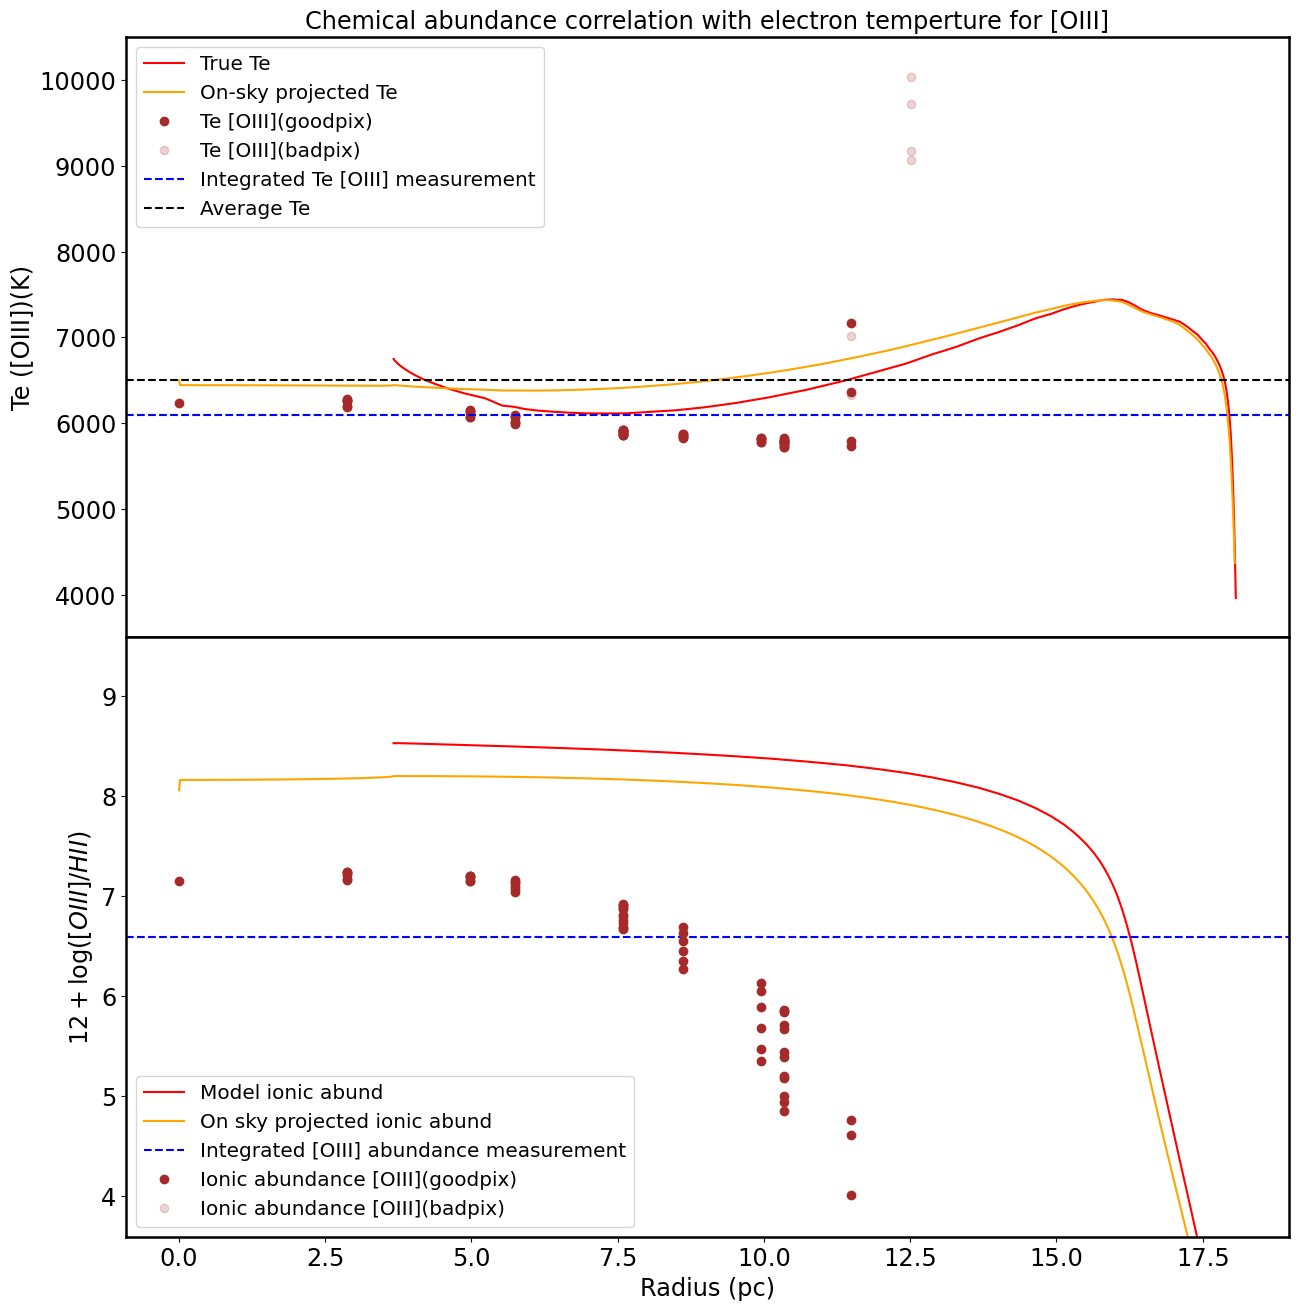

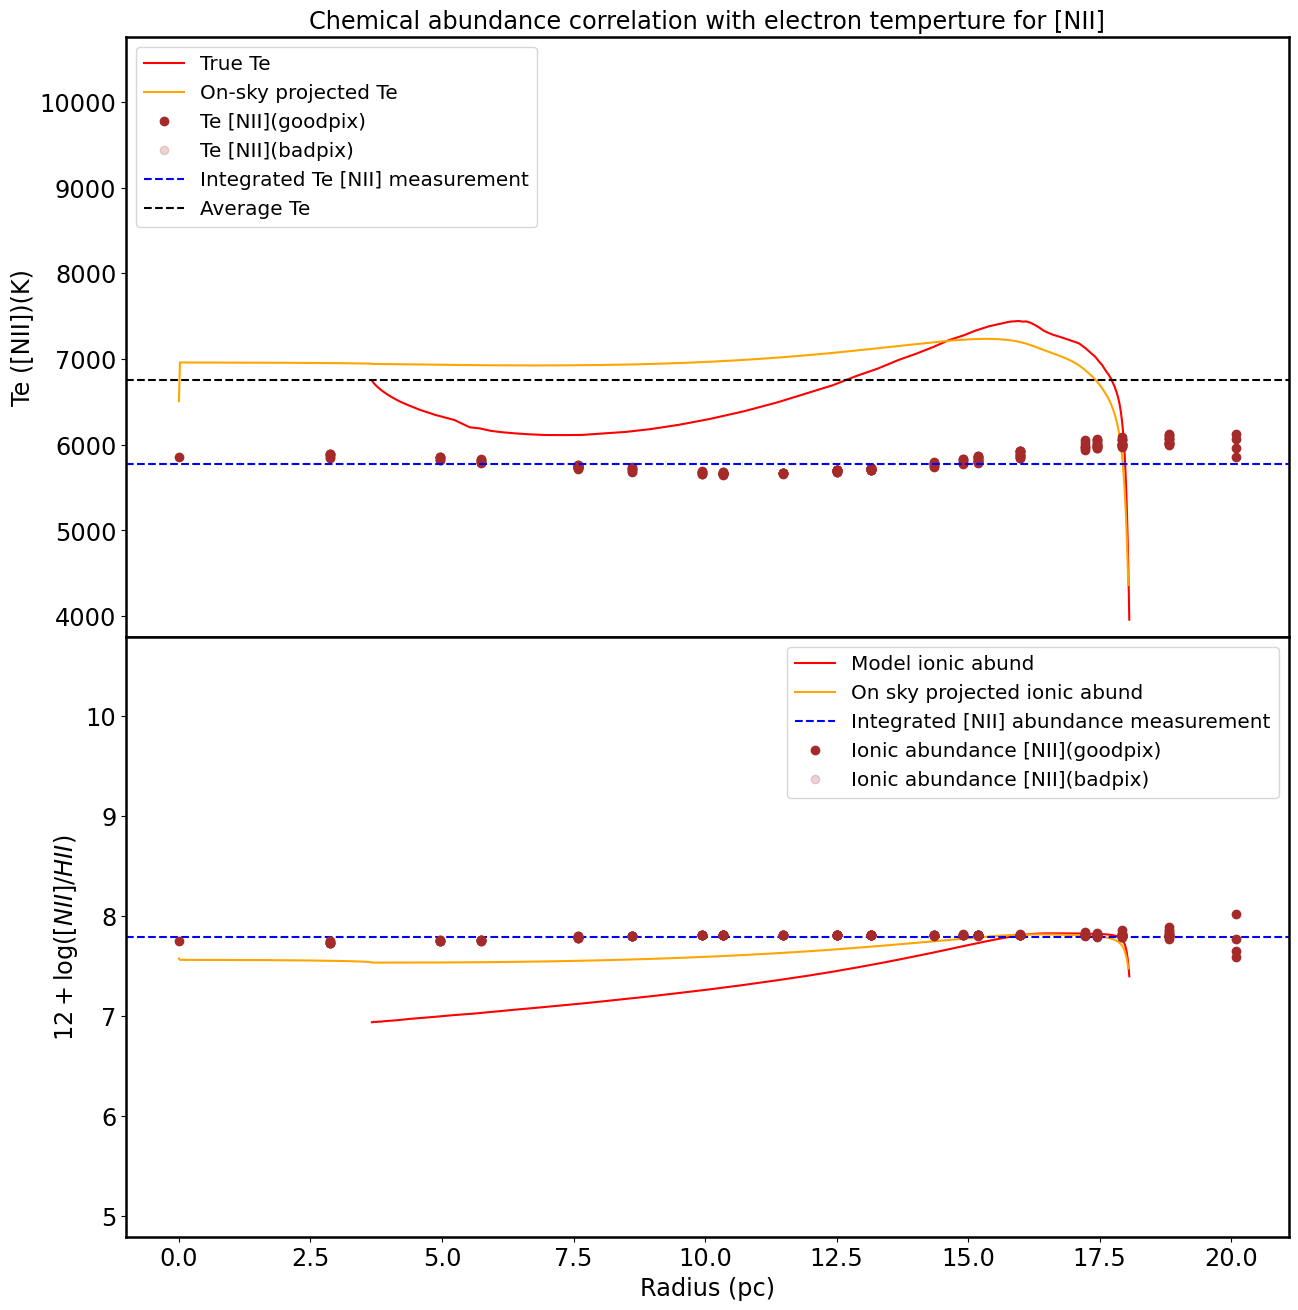

In [ ]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12
#rad2 =18 mostly 0r 17.8

#rad1 = ([OIII]:11.2, [OII]:11.2, [NII]:13.8, [SIII]:17.6, [SII]: 17.6) -------- z=0.5
#rad1 = ([OIII]:9.78, [OII]:9.78, [NII]:13.36, [SIII]:17.35, [SII]: 17.35) -------- z=1
#rad1 = ([OIII]:11.92, [OII]:11.92, [NII]:14.15, [SIII]:17.5, [SII]: 17.5) -------- z=0.2
#rad1 = ([OIII]:11.17, [OII]:11.17, [NII]:13.83, [SIII]:17.5, [SII]: 17.5) -------- z=0.4
#rad1 = ([OIII]:10.75, [OII]:10.75, [NII]:13.65, [SIII]:17.41, [SII]: 17.41) -------- z=0.6
#rad1 = ([OIII]:10.26, [OII]:10.26, [NII]:13.44, [SIII]:17.33, [SII]: 17.33) -------- z=0.8

#log_ion_sun = -3.31 ----[O]
#log_ion_sun = -4.17 ----[N]
#log_ion_sun = -4.88 ----[S]

z1 = 1

#[OII]
#line = 3726    
#u.Integrated_meas()
#u.chem_abund(line)
#u.chem_abund_emperical(line)
#u.Te_Abund_plot(u.linefitdict['TeO2'], u.vals[5], u.int_TO2, u.int_OpH, u.OpH, u.Abund_O2,  testline = np.array(line), z = z1, log_ion_sun = -3.31, rad1 = 10, rad2 = 17.8, label = '[OII]', outfilename = 'O2_Te_chem_abund_vs_R.png')

#[OIII]
line = 4363  
u.Integrated_meas()
u.chem_abund(line)
u.chem_abund_emperical(line)
u.Te_Abund_plot(u.linefitdict['TeO3'], u.vals[6], u.int_TO3, u.int_OppH, u.OppH, u.Abund_O3,  testline = np.array(line), z = z1, log_ion_sun = -3.31, rad1 = 9.78, rad2 = 18, label = '[OIII]', outfilename = 'O3_Te_chem_abund_vs_R.png')

#[SII]
#line = 6716   
#u.Integrated_meas()
#u.chem_abund(line)
#u.chem_abund_emperical(line)
#u.Te_Abund_plot(u.linefitdict['TeS2'], u.vals[11], u.int_TS2, u.int_SpH, u.SpH, u.Abund_S2,  testline = np.array(line), z = z1, log_ion_sun = -4.88, rad1 = 17.35, rad2 = 17.8, label = '[SII]', outfilename = 'S2_Te_chem_abund_vs_R_present.png')

##[SIII]
#line = 6312  
#u.Integrated_meas()
#u.chem_abund(line)
#u.chem_abund_emperical(line)
#u.Te_Abund_plot(u.linefitdict['TeS3'], u.vals[12], u.int_TS3, u.int_SppH, u.SppH, u.Abund_S3,  testline = np.array(line), z = z1, log_ion_sun = -4.88, rad1 = 17.35, rad2 = 17.5, label = '[SIII]', outfilename = 'S3_Te_chem_abund_vs_R_present.png')

##[NII]
line = 5755   
u.Integrated_meas()
u.chem_abund(line)
u.chem_abund_emperical(line)
u.Te_Abund_plot(u.linefitdict['TeN2'], u.vals[8], u.int_TN2, u.int_NpH, u.NpH, u.Abund_N2,  testline = np.array(line), z = z1, log_ion_sun = -4.17, rad1 = 13.36, rad2 = 17.8, label = '[NII]', outfilename = 'N2_Te_chem_abund_vs_R_present.png')

In [ ]:
# Plot for [OIII]

th: 0.7484193978829825 
 12+log10(O++/H+): 5.364235780106395


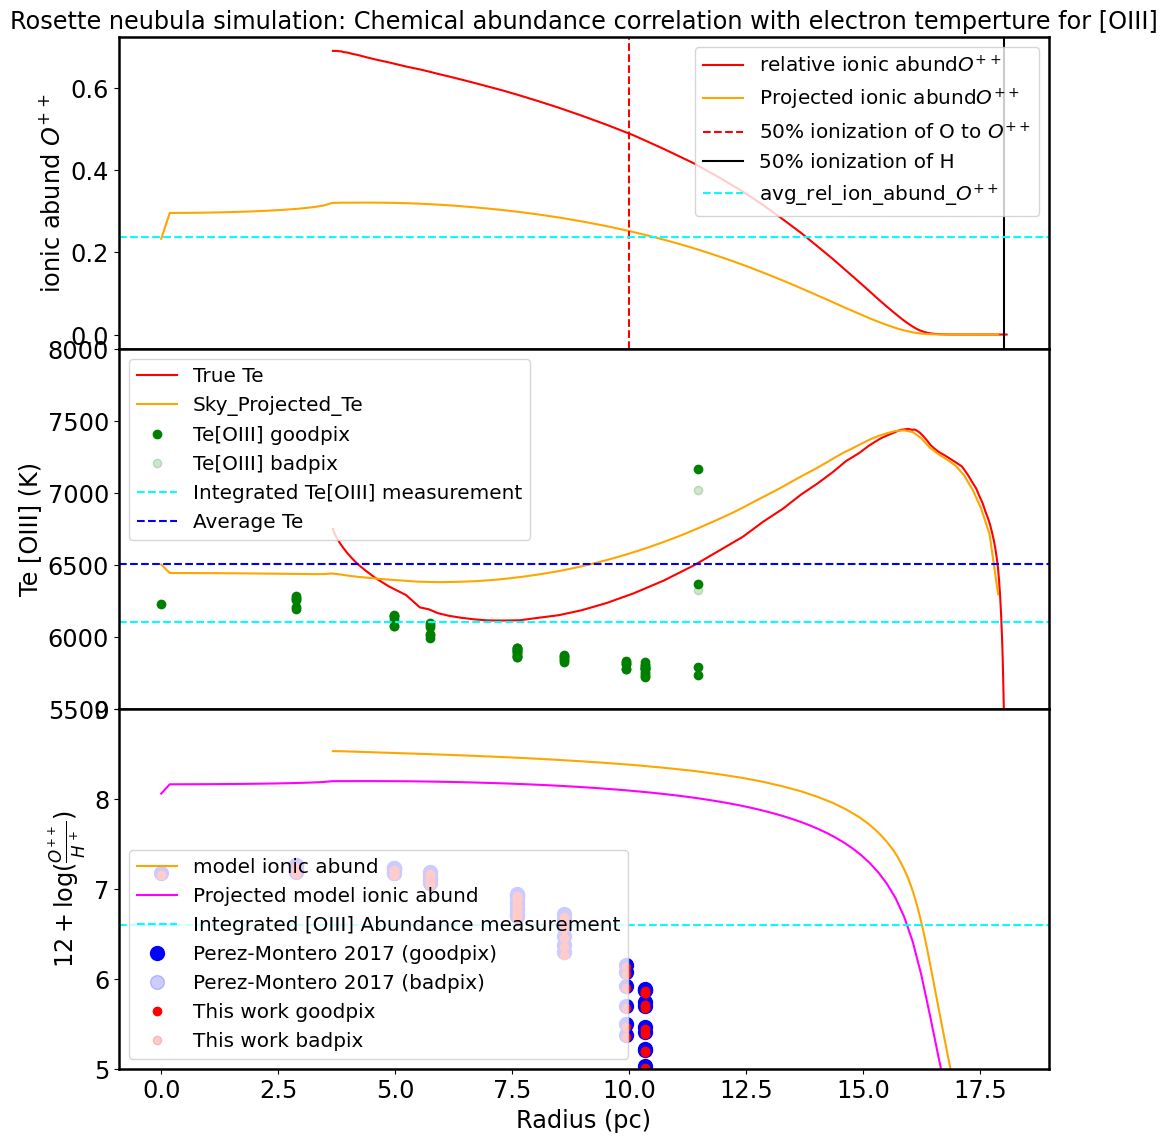

In [ ]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12

import astropy.units as unit 
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 

#O++ abundance 
TeO3=u.linefitdict['TeO3'] 

u.projectedTe(u.vals[6], n=100) 
u.chem_abund(5007)
u.avg_Te(u.vals[6])

I_4959=u.linefitdict['4959_flux']
I_5007=u.linefitdict['5007_flux']
I_4861=u.linefitdict['4861_flux']
Th=u.linefitdict['TeO3']/1e4 
 
Abund_O3=np.log10(np.divide((I_4959+I_5007),I_4861))+6.1868+np.divide(1.2491,Th)-0.5816*np.log10(Th) # from Perez-Montero 2017
print('th:', np.nanmean(Th),'\n','12+log10(O++/H+):', np.nanmean(Abund_O3))

good=u.linefitdict['4363_flux']/u.linefitdict['4363_flux_err']>=3  
bad=u.linefitdict['4363_flux']/u.linefitdict['4363_flux_err']<3    

#relative ionic abundance plots
fig, (ax1, ax2, ax)=plt.subplots(3, 1, figsize=(12,12))  
ax1.plot(u.vals[0], u.vals[6], color='red', label='relative ionic abund'r'$ O^{++}$')  
ax1.plot(u.R, u.aproj, color='orange', label='Projected ionic abund' r'$ O^{++}$')  
ax1.axvline(x=10, c='red', linestyle='--', label='50% ionization of O to 'r'$ O^{++}$')  
ax1.axvline(x=18, c='black', label='50% ionization of H')
ax1.axhline(y=np.average(u.vals[6]), c='cyan', linestyle='--', label='avg_rel_ion_abund_$ O^{++}$')  

ax1.legend(loc='upper right')  
ax1.set_ylabel('ionic abund 'r'$ O^{++}$') 
ax1.set_title('Rosette neubula simulation: Chemical abundance correlation with electron temperture for [OIII]')
  
# Electron temperature plots   
ax2.plot(u.vals[0], u.vals[1], color='red', label='True Te')  
ax2.plot(u.R, u.Teproj, color='orange', label='Sky_Projected_Te')  
ax2.plot(rad[good], TeO3[good], 'o', color='green', label='Te[OIII] goodpix')  
ax2.plot(rad[bad], TeO3[bad], 'o', color='green',   label='Te[OIII] badpix', alpha=0.2) 
ax2.axhline(y=u.int_TO3, c='cyan', linestyle='--', label='Integrated Te[OIII] measurement')   
ax2.axhline(y=u.avgTe, c='blue', linestyle='--', label='Average Te')   
   

ax2.set_ylim(5500, 8000)
ax2.set_ylabel('Te [OIII] (K)')  
ax2.legend()     
  
# O++ ionic abundance  
Zmodel= 1.0                                    # cloudy model abundance relative to solar  
logOHsun= -3.31                               # solar abundance patter from GASS (Grevesse et al 2010)  
logOHmodel = logOHsun + np.log10(Zmodel)      # total Oxygen elemental abundance in the model  
logOppHmodel = logOHmodel+np.log10(u.vals[6]) # ionic abundance of O++ in the model  
logOppHproj = logOHmodel+np.log10(u.aproj)    # ionic abundance of O++ in the model  
  
ax.plot(u.vals[0], 12+logOppHmodel, color='orange', label='model ionic abund')  
ax.plot(u.R, 12+logOppHproj, color='magenta', label='Projected model ionic abund')  
ax.set_ylim(5,9)  
ax.axhline(y=12+np.log10(u.int_OppH), c='cyan', linestyle='--', label='Integrated [OIII] Abundance measurement')    

ax.plot(rad[good], Abund_O3[good], 'o', color='blue', markersize='10', label='Perez-Montero 2017 (goodpix)')  
ax.plot(rad[bad], Abund_O3[bad], 'o', color='blue', markersize='10', label='Perez-Montero 2017 (badpix)', alpha=0.2)  
ax.plot(rad[good], 12+np.log10(u.OppH)[good], 'o', color='red', label='This work goodpix')  
ax.plot(rad[bad], 12+np.log10(u.OppH)[bad], 'o', color='red', label='This work badpix', alpha=0.2)  
  
ax.set_xlabel('Radius (pc)')  
#ax.set_ylabel('12+log10(O++/H+)') 
ax.set_ylabel(r'$12+\log(\frac{O^{++}}{H^+})$') 
ax.legend(loc='lower left')     
  
ax1.set_position([0.125, 0.8, 0.775, 0.26])  # [left, bottom, width, height]  
ax2.set_position([0.125, 0.5, 0.775, 0.3])   
ax.set_position([0.125, 0.2, 0.775, 0.3])  

plotdir=u.datadir+u.simname+'/'+'Abundance_plots_'+u.simname +'/'
if (not os.path.isdir(plotdir)):
    os.mkdir(plotdir) 

plt.savefig('/'+plotdir+'/'+'TeO3_chem_abundO3_vs_R_present.png', dpi=200)
#plt.savefig('/home/amrita/LVM/lvmnebular/Bubble_v2_5e-14/Bubble_v2_5e-14_snbinned/Bubble_v2_5e-14_snbinned_plotprofile/snbin_TeO3_chem_abundO3_vs_R.png', dpi=300)  
plt.show()  

In [ ]:
#Overplot profiles

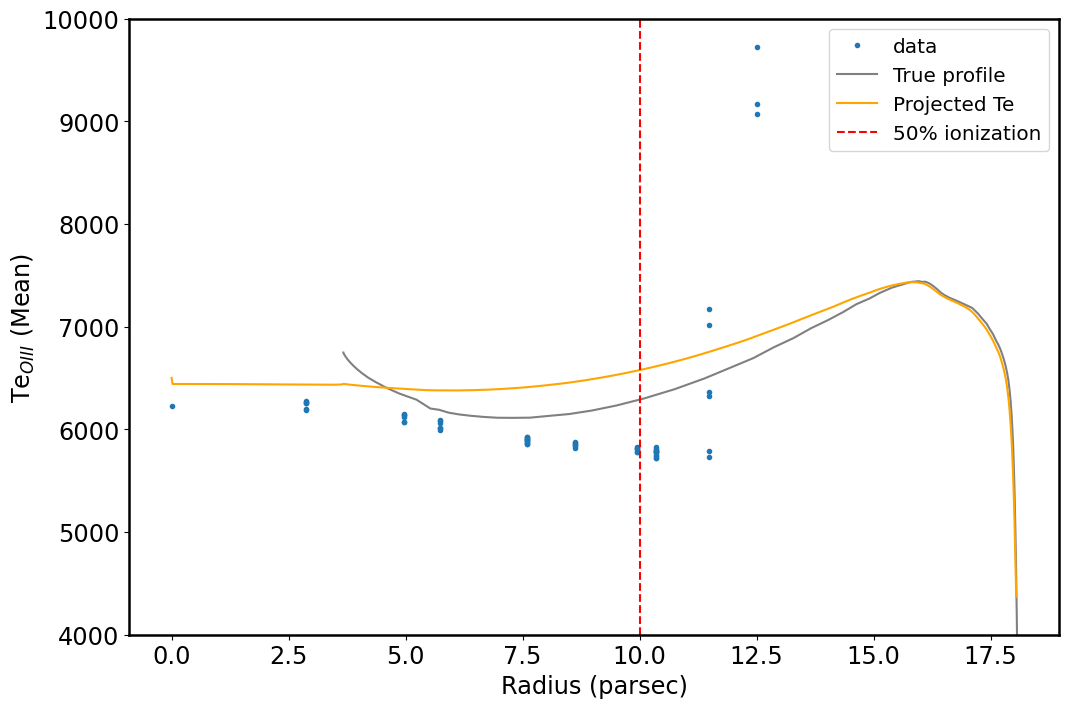

In [ ]:
#Radius:0, 'Te':1, 'ne':2, 'H+':3, 'O0':4, 'O+':5, 'O++':6, 'N0':7, 'N+':8, 'N++':9, 'S0':10, 'S+':11, 'S++:12
#def overplotprofile(self, z, val1, val2, min, max, x, n, title='line_map', output='line_map', radbin=False, vorbin=False, snbin=False, pertsim=False)

#u.overplotprofile(u.linefitdict['TeN2'], u.vals[1], u.vals[8],  5000 , 9000, 13.8, title=r'Te$_{NII}$ (Mean)', output='TeN2',  radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['TeS2'], u.vals[1], u.vals[11], 5000 , 8000, 17.8, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['TeS3'], u.vals[1], u.vals[12], 5000 , 9000, 17.8, title=r'Te$_{SIII}$ (Mean)', output='TeS3', radbin=False, vorbin=False,  snbin=False)
u.overplotprofile(u.linefitdict['TeO3'], u.vals[1], u.vals[6],   4000, 10000, 10.0, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['neO2'], u.vals[2], u.vals[5],  10 , 200,    10.0, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['neS2'], u.vals[2], u.vals[11], 50 , 1800,   17.8, title=r'ne$_{SII}$ (Mean)', output='neS2',    radbin=False, vorbin=False,  snbin=False)
#u.overplotprofile(u.linefitdict['TeO2'], u.vals[1], u.vals[5],  5000 , 10000,10.0, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, vorbin=False,  snbin=False)

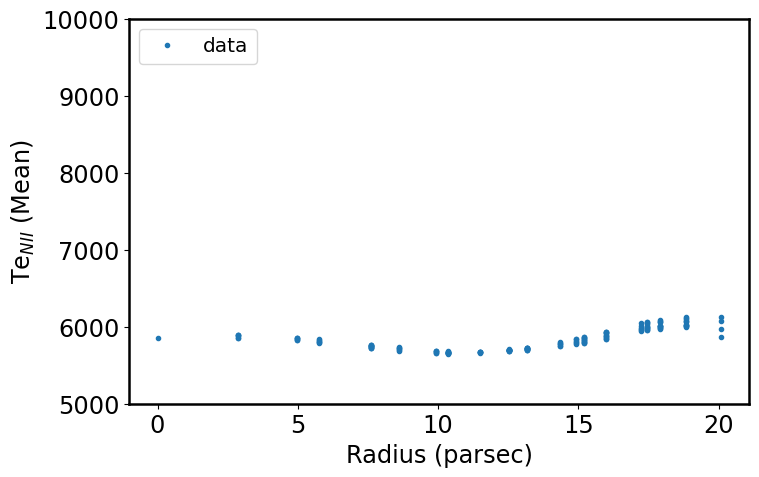

In [ ]:
#MakeRadialbin plot profiles
u.plotprofile(u.linefitdict['TeN2'], 5000 , 10000, title=r'Te$_{NII}$ (Mean)', output='TeN2', radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['TeS2'], 5000 , 8000, title=r'Te$_{SII}$ (Mean)', output='TeS2',  radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['TeS3'], 5000 , 10000, title=r'Te$_{SIII}$ (Mean)', output='TeS3',radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['TeO3'], 4000 , 12000, title=r'Te$_{OIII}$ (Mean)', output='TeO3',radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['neO2'], 10 , 200, title=r'ne$_{OII}$ (Mean)', output='neO2',     radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['neS2'], 1000 , 1800, title=r'ne$_{SII}$ (Mean)', output='neS2',  radbin=False, snbin=False)
#u.plotprofile(u.linefitdict['TeO2'], 8000 , 10000, title=r'Te$_{OII}$ (Mean)', output='TeO2', radbin=False, snbin=False)



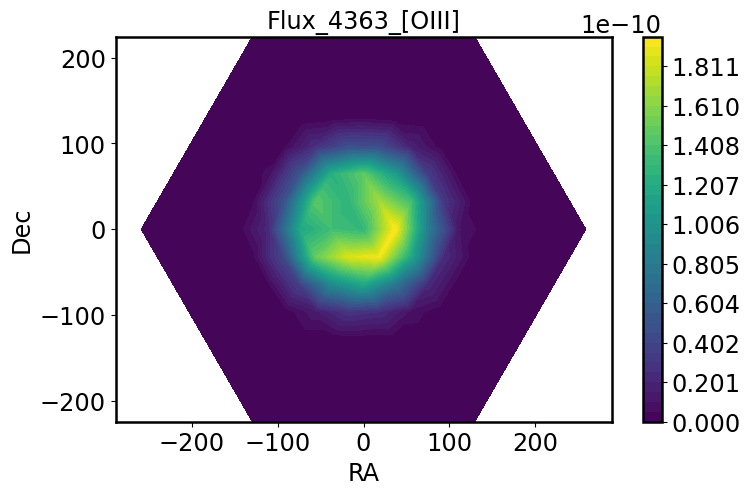

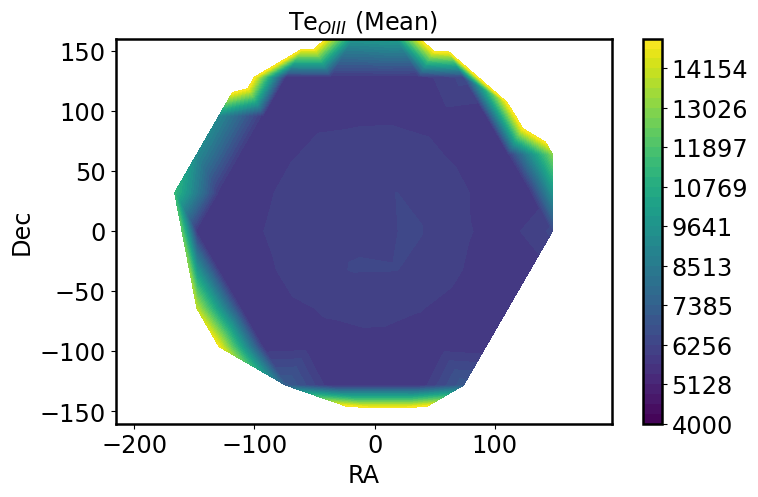

In [ ]:
#Make plot profiles
u.plotmap(u.linefitdict['4363_flux'], np.min(u.linefitdict['4363_flux']) , np.max(u.linefitdict['4363_flux']),  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title='Flux_4363_[OIII]', output='4363_flux',   vorbin=False)
#u.plotmap(u.linefitdict['5007_flux'], np.min(u.linefitdict['5007_flux']) , np.max(u.linefitdict['5007_flux']),  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title='Flux_5007_[OIII]', output='5007_flux',   vorbin=False)
#u.plotmap(u.linefitdict['5755_flux'], np.min(u.linefitdict['5755_flux']) , np.max(u.linefitdict['5755_flux']),  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title='Flux_5755_[NII]', output='5755_flux',   vorbin=False)
#u.plotmap(u.linefitdict['6312_flux'], np.min(u.linefitdict['6312_flux']) , np.max(u.linefitdict['6312_flux']),  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title='Flux_6312_[SIII]', output='6312_flux',   vorbin=False)
#
#u.plotmap(u.linefitdict['TeN2'], 5000 , 10000,  table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{NII}$ (Mean)', output='TeN2',   vorbin=False)
#u.plotmap(u.linefitdict['TeS2'], 5000 , 18000, table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{SII}$ (Mean)', output='TeS2',   vorbin=False)
#u.plotmap(u.linefitdict['TeS3'], 5000 , 10000, table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{SIII}$ (Mean)', output='TeS3', vorbin=False)
u.plotmap(u.linefitdict['TeO3'], 4000 , 15000, table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{OIII}$ (Mean)', output='TeO3', vorbin=False)
#u.plotmap(u.linefitdict['neO2'], 10 , 200,     table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'ne$_{OII}$ (Mean)', output='neO2',      vorbin=False)
#u.plotmap(u.linefitdict['neS2'], 100 , 250,    table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'ne$_{SII}$ (Mean)', output='neS2',   vorbin=False)
#u.plotmap(u.linefitdict['TeO2'], 8000 , 20000, table = u.datadir+u.simname+'/'+u.simname+'_linefits.fits', title=r'Te$_{OII}$ (Mean)', output='TeO2',  vorbin=False)

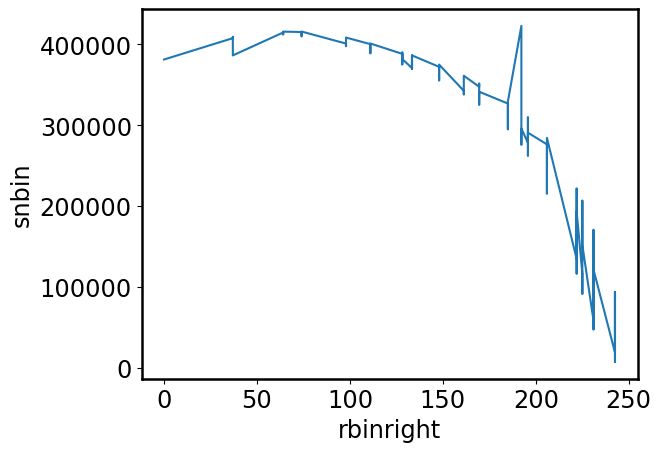

In [ ]:
u.sn_radialbin(target_sn=500, lineid='6563', rmin=0, rmax=250, pertsim=False)
#print(u.snbinned_flux, u.flux)

166
[[ 6.61762701e-16  1.63584068e-14 -1.60805902e-14 ... -6.90918761e-15
   3.96716166e-16  5.58384321e-15]
 [ 1.02312316e-15  1.37487449e-14  8.50637072e-15 ...  1.69329573e-15
  -8.93228769e-15  2.65308613e-15]
 [ 2.07271334e-14 -2.25597349e-14 -4.64060807e-15 ...  5.23835668e-15
  -1.80722136e-14  2.71486702e-15]
 ...
 [-4.55005127e-14  1.31724105e-15 -2.09635720e-15 ...  2.53716416e-15
   1.17064815e-14  4.44478294e-15]
 [-1.37030847e-14 -4.56756503e-15  9.61842842e-15 ... -3.41185866e-15
  -5.51403795e-15 -1.35336053e-14]
 [-4.13705820e-16  7.88744460e-15  1.16605266e-14 ...  5.92910019e-15
  -3.50272979e-16  1.05096968e-14]]


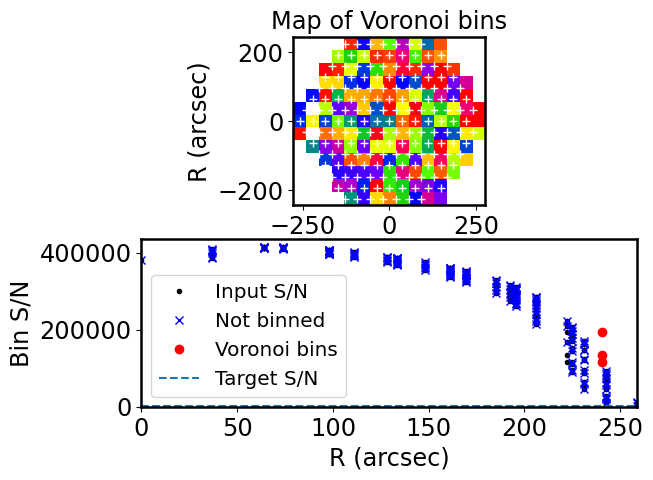

In [ ]:
u.voronoibin(target_sn=1000, lineid='6563') #Caution: run once after fitting lines in native simulation

In [ ]:
simname = 'pert_0.5_0.3_Bubble_v2_5e-14'

with fits.open('./Perturbation/cube_4D_cart.fits') as hdul:
     data=hdul[0].data

with fits.open('/home/amrita/LVM/lvmnebular/'+simname+'/testneb_tutorial3_ex1.fits') as hdu:
    vals=hdu['Comp_0_PhysParams'].data
    e_5007 = hdu['COMP_0_FLUX_5006.84'].data
    print(np.mean(e_5007), e_5007.shape, vals[0].shape)
 
chi = 6.626e-24*299792485/5006.84

Lc = e_5007*chi/100

hdu=fits.PrimaryHDU(data = Lc)
hdu.writeto('./'+simname+'/pert_0.5_0.3_cooling_rate_cube.fits', overwrite='True')

FileNotFoundError: [Errno 2] No such file or directory: '/home/amrita/LVM/lvmnebular/pert_0.5_0.3_Bubble_v2_5e-14/testneb_tutorial3_ex1.fits'

In [ ]:
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 


R  = u.vals[0]
T0 = u.vals[1]
ne = u.vals[2]
a  = u.vals[5]

R  = R [1:]
T0 = T0[1:]
ne = ne[1:]
a  = a [1:]

cubic_interp_T0 = interp1d(R, T0, kind='cubic', axis=-1, bounds_error=False)
cubic_interp_ne = interp1d(R, ne, kind='cubic', axis=-1, bounds_error=False)
cubic_interp_a = interp1d(R, a, kind='cubic', axis=-1, bounds_error=False)

r0aux=rad
T0aux=cubic_interp_T0(r0aux)
aaux=cubic_interp_a(r0aux)
neaux=cubic_interp_ne(r0aux)

plt.scatter(u.linefitdict['TeN2'], (T0aux*neaux*aaux)/(neaux*aaux))

print(np.sum(T0aux*neaux*aaux)/np.sum(neaux*aaux))
plt.hlines(np.sum(T0aux*neaux*aaux)/np.sum(neaux*aaux), xmin = 5000, xmax = 8000, colors= 'red')
print(r0aux.shape, R.shape, T0aux.shape)

plt.xlim(5000, 8000)
#plt.ylim(6000, 8000)
plt.show()


plt.scatter(r0aux, (T0aux*neaux*aaux)/(neaux*aaux))
plt.plot(u.vals[0], u.vals[1])

plt.xlim(0, 20)
plt.ylim(5000, 8500)

In [ ]:
import astropy.units as unit 
distance=16000 * unit.pc 
r=np.sqrt(u.linefitdict['delta_ra']**2+u.linefitdict['delta_dec']**2) 
rad=r*distance*np.pi/648000 # converting arcsecs to parsec 

with fits.open('./Bubble_v2_5e-14/Bubble_v2_5e-14 diag_Temp_Den.fits')as hdul1:
    data3 = hdul1[1].data

with fits.open('./pert_0.5_0.8_Bubble_v2_5e-14/pert_0.5_0.8_Bubble_v2_5e-14 diag_Temp_Den.fits')as hdul1:
    data5 = hdul1[1].data

#print(np.nanmean(data['TeO3']), np.nanmean(data1['TeO3']), rad)

plt.scatter(rad, data3['TeO3'], color = 'green')
plt.scatter(rad, data5['TeO3'], color = 'blue')
plt.plot(u.vals[0], u.vals[1])
plt.ylim(5000, 10000)

plt.show()